# 프로젝트 고양이 수염 스티커 만들기

## Library Load

In [1]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.7.0
19.24.1


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

## My Photo or IU Photo Prepare

In [3]:
def get_image_files(folder_path):
    image_extensions = [".jpg", ".jpeg", ".png"]  # 이미지 파일 확장자 리스트
    image_files = []
    
    for file_name in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file_name)):
            ext = os.path.splitext(file_name)[1]  # 파일명의 확장자 가져오기
            if ext.lower() in image_extensions:  # 이미지 파일인 경우
                image_files.append(file_name)
    
    return image_files

#IU 사진 List
iu_folder_path = "./images/iu" 
iu_files = get_image_files(iu_folder_path)
print(iu_files)

#내 사진 List
craig_folder_path = "./images/craig"
craig_files = get_image_files(craig_folder_path)
print(craig_files)

['iu4.jpeg', 'iu3.jpeg', 'iu2.jpg', 'iu6.jpg', 'iu5.jpg', 'iu1.jpeg']
['park3.jpeg', 'park2.jpeg', 'park4.jpeg', 'park1.jpeg']


In [4]:
iu_files[0]

'iu4.jpeg'

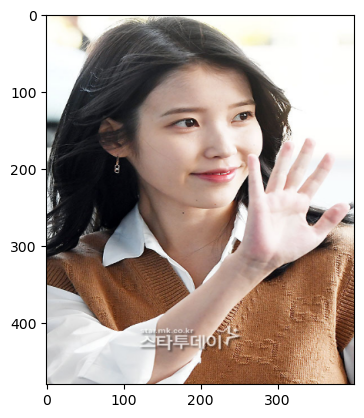

In [5]:
image_path = iu_folder_path + '/' + iu_files[0]
img_bgr = cv2.imread(image_path)  # OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (400, 480))    # Resize
img_show = img_bgr.copy()      # 출력용 이미지 별도 카피
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # RGB 이미지로 변경
plt.imshow(img_rgb)
plt.show()

# Single Image - Face Detection & Apply Sticker Function Code & Analysis

## Face Detection

rectangles[[(132, 81) (287, 236)]]


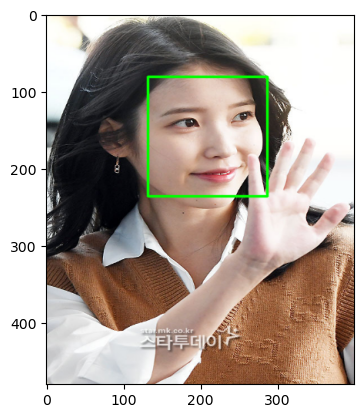

In [6]:
detector_hog = dlib.get_frontal_face_detector()   # dlib을 활용해 hog detector를 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # dlib은 rgb 이미지를 입력으로 받음
dlib_rects = detector_hog(img_rgb, 1)   # detector를 이용해서 얼굴의 bounding box를 추출

print(dlib_rects)   # 얼굴 영역 좌표 출력

# 이미지 위에 얼굴의 bounding box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Face Landmark

In [7]:
# landmark 모델을 불러오기
model_path = './models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 개별 위치 저장
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))   # 68개의 (x,y) 튜플로 이루어진 리스트

68


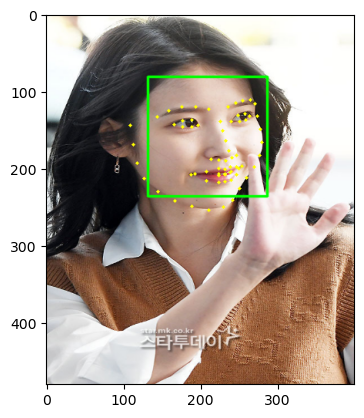

In [8]:
# 이미지에 landmark 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Applying stickers

### Calculate sticker position and size

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y)) 
    print ('(w,h) : (%d,%d)'%(w,h)) 

(237, 177)
(x,y) : (237,177)
(w,h) : (156,156)


### Resize sticker & adjust coordinates

In [10]:
sticker_path = './images/cat_beard.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#plt.imshow(img_sticker)
#plt.show()

(156, 156, 3)


In [11]:
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (159,99)


### Applying Stickers

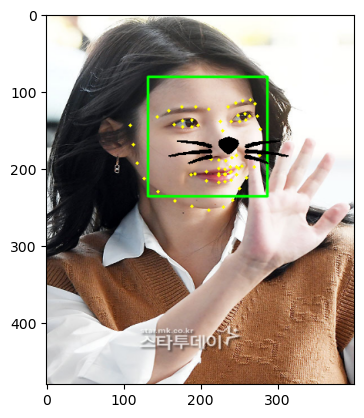

In [12]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

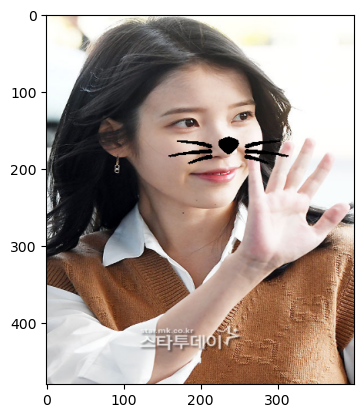

In [13]:
# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))  # img_show 대신 아껴 두었던 img_rgb 사용
plt.show()

# Multi-Image - Face Detection & Apply Sticker Function Code & Analysis

In [14]:
#다양한 사진 검토를 위해 위 코드를 함수화
def apply_sticker(image_file, folder_path, sticker_path, model_path):
    image_path = os.path.join(folder_path, image_file)
    img_bgr = cv2.imread(image_path)
    img_height = 480
    img_width = int(img_bgr.shape[1] * (img_height / img_bgr.shape[0]))
    img_bgr = cv2.resize(img_bgr, (img_width, img_height))
    img_show = img_bgr.copy()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    detector_hog = dlib.get_frontal_face_detector()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1)

    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    model_path = './models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)

    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)

    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[30][0]
        y = landmark[30][1]
        w = dlib_rect.width()
        h = dlib_rect.width()

        sticker = cv2.imread(sticker_path)
        sticker = cv2.resize(sticker, (w,h))

        refined_x = x - w // 2
        refined_y = y - h // 2

        sticker_area = img_show[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]]
        img_show[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = \
            np.where(sticker==0, sticker, sticker_area).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()

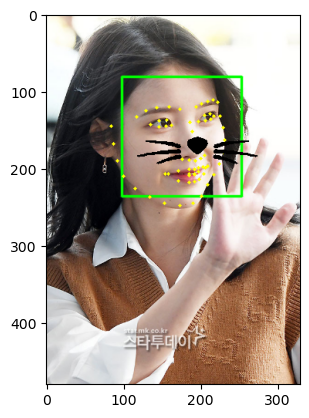

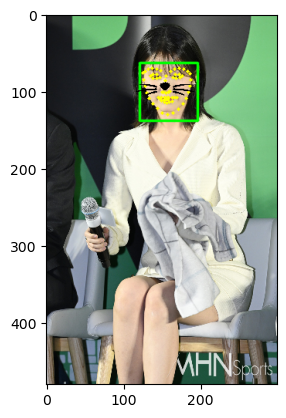

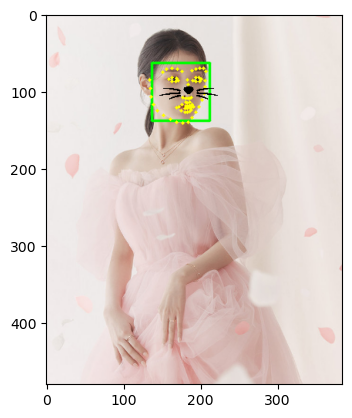

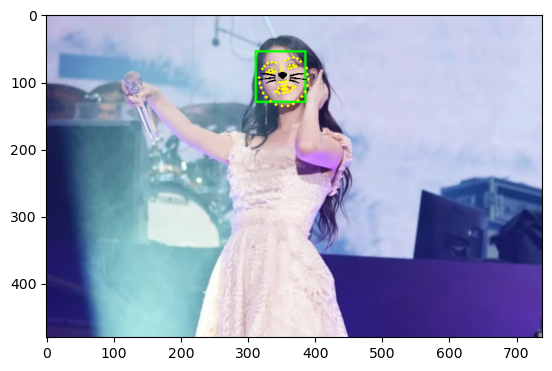

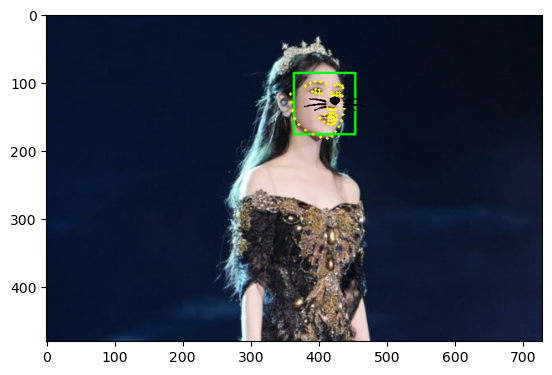

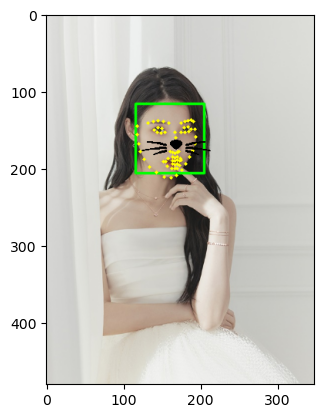

In [15]:
sticker_path = './images/cat_beard.png'
model_path = './models/shape_predictor_68_face_landmarks.dat'
for i in range(len(iu_files)):
    image_file = iu_files[i]
    apply_sticker(image_file, iu_folder_path, sticker_path, model_path)

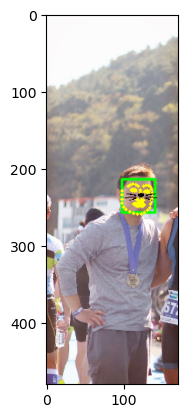

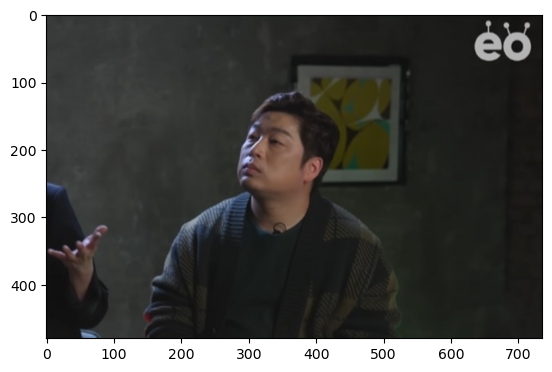

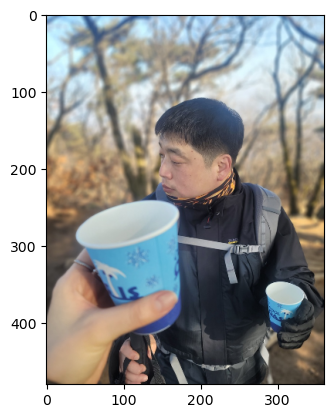

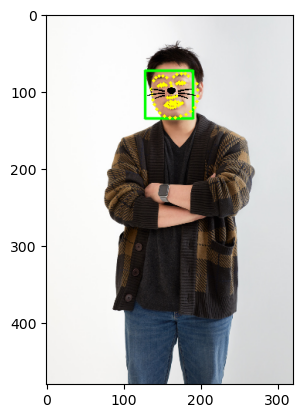

In [16]:
for i in range(len(craig_files)):
    image_file = craig_files[i]
    apply_sticker(image_file, craig_folder_path, sticker_path, model_path)

# Report 
#### 1. 분석
     1. 테스트 케이스에서 대부분의 적정 거리, 노출, 각도에서는 잘 나온다. (IU 사진 케이스)
     2. 하지만 재영 사진 케이스에서는 일부 미인식 사례가 발생했다. 
     3. 아이유 케이스 vs 재영 케이스 차이 
         - 고개 각도에서 단순히 좌우가, 좌상향, 우하향 각도의 차이가 발생했다. 
             - 대각선 방향의 얼굴 회전은 인식하지 못한다.
             - 논리적으로 인식기의 한계를 인정할 수 있다. 
         - 이쁜 사람과 못생긴 사람의 차이일 수 있다. (검증 필요)
#### 2. 추가 가설 : 이쁜 사람은 잘 잡아내고, 못생긴 사람은 잘 붙이지 스티커를 인식 하지 못할 수 있다. 
     1. 아이유의 얼굴 비율은 완벽하다. (이쁜 사람 )
     2. 못 생겼다는 건 얼굴 비율이 정상적이지 않다는 의미일 수 있다.(못생긴 사람)
    


#### 3. 추가 가설 검증 진행 
     1. 미남 케이스 : 정우성 (흑백 사진, 어두운 사진 포함)
     2. 추남 케이스 : 구글에 못생긴 사람으로 치면 나오는 사람들

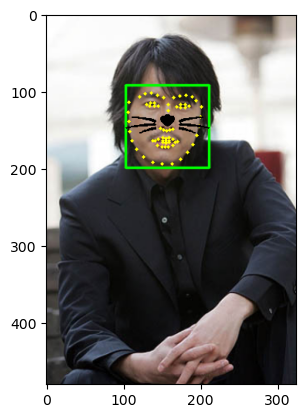

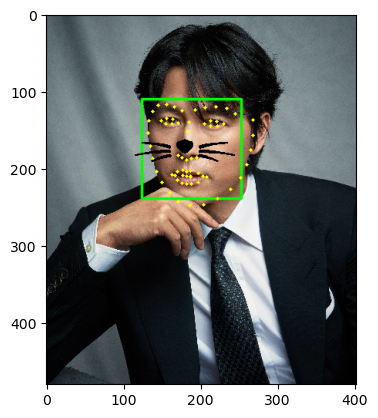

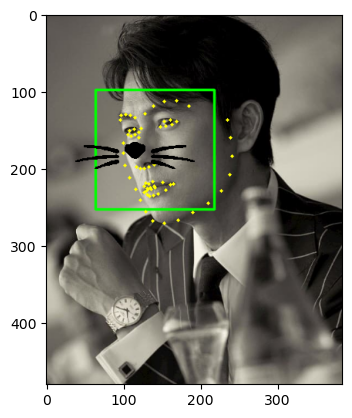

In [17]:
# 미남 케이스(정우성) 
jung_folder_path = "./images/jung" 
jung_files = get_image_files(jung_folder_path)
for i in range(len(jung_files)):
    image_file = jung_files[i]
    apply_sticker(image_file, jung_folder_path, sticker_path, model_path)

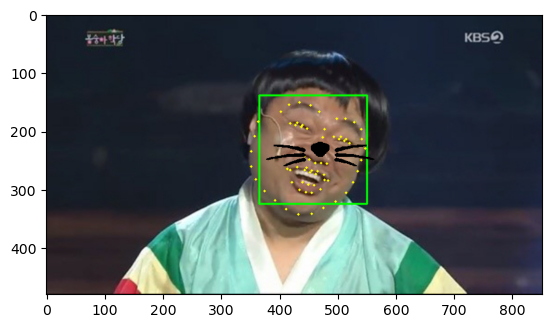

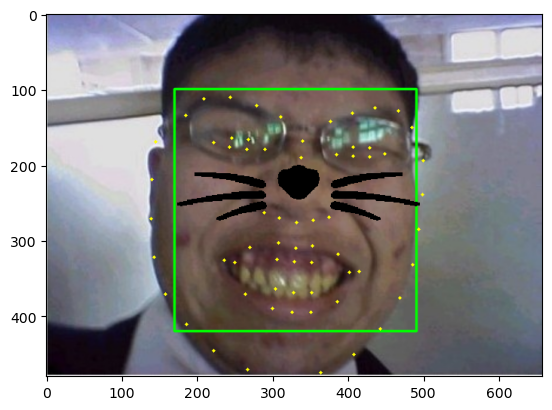

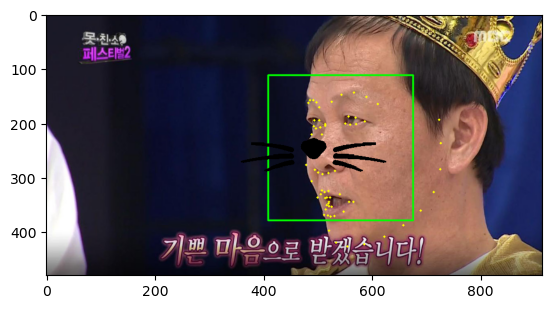

In [ ]:
# 추남 케이스 (구글 '못생긴 사람' 결과)
ugly_folder_path = "./images/ugly" 
ugly_files = get_image_files(ugly_folder_path)
for i in range(len(ugly_files)):
    image_file = ugly_files[i]
    apply_sticker(image_file, ugly_folder_path, sticker_path, model_path)

#### 3. 추가 가설 검증 진행 : 실패
     1. 추가 가설은 유효하지 않았다.